In [1]:
%matplotlib inline

In [2]:
from scipy.stats import norm
import numpy as np

import matplotlib.pyplot as plt

from simple_hsmm.hsmm import (
    ContinuousHSMMModel, MultinomialHSMMModel
)

# Continuous observations

## Non-parametric durations

In [3]:
means = np.array([0.0, 8.0, 10.0])
scales = np.array([1.0, 1.0, 1.0])

durations = np.zeros([3, 10])
durations[:, 0] = 0.1
durations[0, 4] = durations[1, 9] = durations[2, 4] = 0.9

tmat = np.array([
    [0.0, 0.5, 0.5],
    [0.5, 0.0, 0.5],
    [0.5, 0.5, 0.0]
])

In [4]:
hsmm = ContinuousHSMMModel(norm, means, scales, durations, tmat)

In [5]:
emissions, states = hsmm.sample(300)

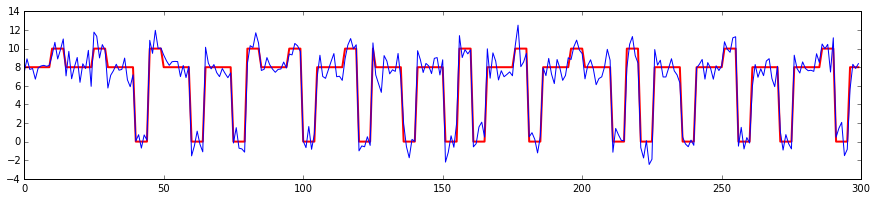

In [6]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(means[states], 'r', linewidth=2)
ax.plot(emissions)

In [7]:
reconstructed = hsmm.decode(emissions)

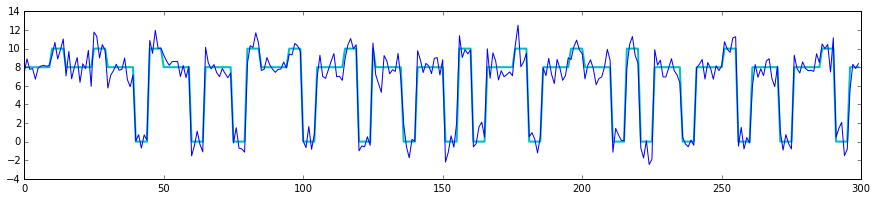

In [8]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(means[reconstructed], 'c', linewidth=2)
ax.plot(emissions)

In [9]:
(reconstructed != states).sum()

0

## Parametric durations

In [10]:
from scipy.stats import geom, binom, randint

In [11]:
d1 = binom(3, .5, loc=1)
d2 = geom(0.3)
d3 = randint(low=1, high=14)
durations = [d1, d2, d3]

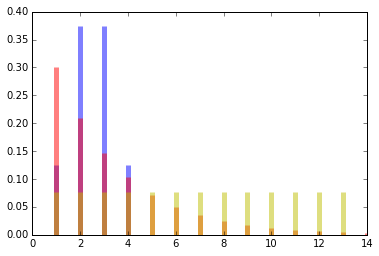

In [12]:
fig, ax = plt.subplots()

x = np.arange(0, 15)
ax.vlines(x, 0, d1.pmf(x), colors='b', lw=5, alpha=0.5)
ax.vlines(x, 0, d2.pmf(x), colors='r', lw=5, alpha=0.5)
ax.vlines(x, 0, d3.pmf(x), colors='y', lw=5, alpha=0.5)

In [13]:
hsmm = ContinuousHSMMModel(norm, means, scales, durations, tmat)

In [14]:
emissions, states = hsmm.sample(300)

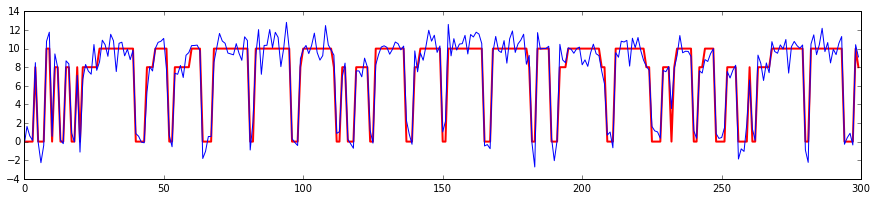

In [15]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(means[states], 'r', linewidth=2)
ax.plot(emissions)

In [16]:
reconstructed = hsmm.decode(emissions)

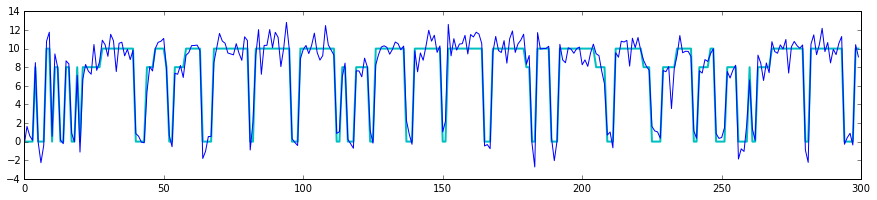

In [17]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(means[reconstructed], 'c', linewidth=2)
ax.plot(emissions)

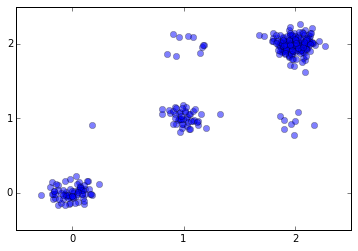

In [18]:
fig, ax = plt.subplots()
j1, j2 = 0.1 * np.random.randn(2, len(states))  # Add some jitter to avoid overlapping datapoints
ax.plot(states + j1, reconstructed + j2, 'o', alpha=.5)
ax.set_xticks(np.unique(states))
ax.set_yticks(np.unique(reconstructed))

# Discrete observations

In [19]:
emissions = np.array([
    [0.3, 0.3, 0.4],
    [0.5, 0.0, 0.5],
    [0.2, 0.4, 0.4]
])

durations = np.zeros([3, 10])
durations[:, 0] = 0.1
durations[0, 4] = durations[1, 9] = durations[2, 4] = 0.9

tmat = np.array([
    [0.0, 0.5, 0.5],
    [0.5, 0.0, 0.5],
    [0.5, 0.5, 0.0]
])

In [20]:
hsmm = MultinomialHSMMModel(emissions, durations, tmat)

In [21]:
emissions, states = hsmm.sample(300)

(-0.5, 2.5)

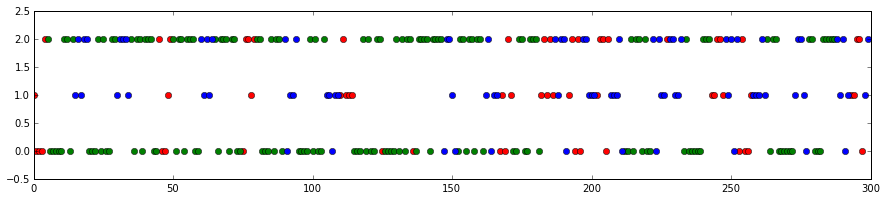

In [22]:
fig, ax = plt.subplots(figsize=(15, 3))
colors = 'rgb'
x = np.arange(len(emissions))
for state, color in enumerate(colors):
    mask = states == state
    ax.plot(x[mask], emissions[mask], color + 'o')
ax.set_ylim([-0.5, 2.5])

In [23]:
reconstructed = hsmm.decode(emissions)

(-0.5, 2.5)

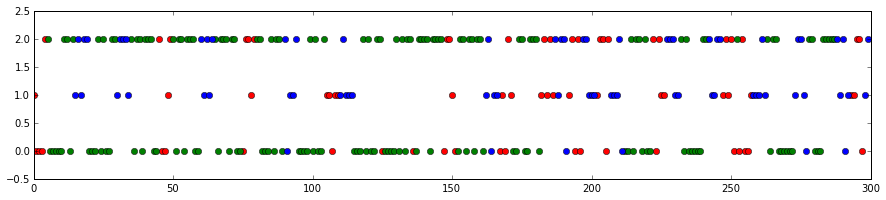

In [24]:
fig, ax = plt.subplots(figsize=(15, 3))
colors = 'rgb'
x = np.arange(len(emissions))
for state, color in enumerate(colors):
    mask = reconstructed == state
    ax.plot(x[mask], emissions[mask], color + 'o')
ax.set_ylim([-0.5, 2.5])

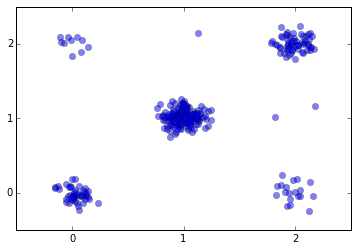

In [25]:
fig, ax = plt.subplots()
j1, j2 = 0.1 * np.random.randn(2, len(states))
ax.plot(states + j1, reconstructed + j2, 'o', alpha=.5)
ax.set_xticks(np.unique(states))
ax.set_yticks(np.unique(reconstructed))